In [50]:
import pandas as pd
%matplotlib notebook
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
from textblob import TextBlob

filename = "data/reviews_full.csv"
reviews_df = pd.read_csv(filename)
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,38585,129120,2010-10-28,55877,Ritchie,Evelyne is an accommodating host who lives in ...
1,38585,147273,2010-11-30,279973,Cathy,Evelyne was very welcoming to her home; my fri...
2,38585,198797,2011-03-14,411638,NaN,I really enjoyed Evelyne's welcoming and bubbl...
3,38585,201932,2011-03-17,441855,Bill,Very gracious host and was helpful in all aspe...
4,38585,341616,2011-06-28,657560,Joakim,Evelyn was very friendly and easy to comunicat...


In [51]:
def get_sentiment(review):
    blob = TextBlob(review)
    sentence_sentiments = [sentence.sentiment.polarity for sentence in blob.sentences]
    sentiments_no_neutral = [sentiment for sentiment in sentence_sentiments if sentiment and type(sentiment) == float]
    return sum(sentiments_no_neutral);

In [52]:
reviews_df = reviews_df[reviews_df["comments"].map(type) == str]

In [53]:
reviews_df["sentiments"] = reviews_df["comments"].map(get_sentiment)


In [54]:
listings = "data/listings.csv"
listings_df = pd.read_csv(listings)
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,55,2,137,2019-11-11,1.24,1,64
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59740,-82.55498,Entire home/apt,765,1,102,2019-11-10,1.02,10,347
2,108061,"Walk downtown or UNCA, Pets OK!",320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,88,2019-10-09,0.88,2,210
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57972,-82.59617,Entire home/apt,107,1,227,2019-11-18,2.24,7,347
4,156805,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,NaN,28806,35.57755,-82.59697,Private room,71,1,64,2019-11-02,0.64,7,345


In [67]:
sentiment_by_listing = pd.DataFrame(reviews_df.groupby("listing_id").mean()['sentiments'])
sentiment_by_listing = sentiment_by_listing.reset_index()
sentiment_by_listing.rename(columns={"listing_id": "id"}, inplace=True)
sentiment_by_listing.head()

,id,sentiments
0,38585,1.996283
1,80905,1.482031
2,108061,1.790912
3,155305,1.311640
4,156805,1.344492


In [68]:
merged_df = pd.merge(sentiment_by_listing, listings_df, on="id",how="right")
merged_df.head()

,id,sentiments,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,38585,1.996283,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,55,2,137,2019-11-11,1.24,1,64
1,80905,1.482031,French Chic Loft,427027,Celeste,NaN,28801,35.59740,-82.55498,Entire home/apt,765,1,102,2019-11-10,1.02,10,347
2,108061,1.790912,"Walk downtown or UNCA, Pets OK!",320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,88,2019-10-09,0.88,2,210
3,155305,1.311640,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57972,-82.59617,Entire home/apt,107,1,227,2019-11-18,2.24,7,347
4,156805,1.344492,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,NaN,28806,35.57755,-82.59697,Private room,71,1,64,2019-11-02,0.64,7,345


In [69]:
#Adding price buckets
bins = [0, 250, 500, 750, 1000, 10000]

# Create the names for the four bins
group_names = ["250 and under", "251-500", "501-750", "751-1000", "Over 1000"]

merged_df["price_bin"] = pd.cut(merged_df["price"], bins, labels=group_names)
merged_df.head()

,id,sentiments,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_bin
0,38585,1.996283,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,55,2,137,2019-11-11,1.24,1,64,250 and under
1,80905,1.482031,French Chic Loft,427027,Celeste,NaN,28801,35.59740,-82.55498,Entire home/apt,765,1,102,2019-11-10,1.02,10,347,751-1000
2,108061,1.790912,"Walk downtown or UNCA, Pets OK!",320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,88,2019-10-09,0.88,2,210,250 and under
3,155305,1.311640,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57972,-82.59617,Entire home/apt,107,1,227,2019-11-18,2.24,7,347,250 and under
4,156805,1.344492,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,NaN,28806,35.57755,-82.59697,Private room,71,1,64,2019-11-02,0.64,7,345,250 and under


In [70]:
import math
merged_df = merged_df[merged_df["sentiments"].map(math.isnan) != True]
sentiment_bypricebin = merged_df.groupby('price_bin').mean()['sentiments']
sentiment_bypricebin = pd.DataFrame(sentiment_bypricebin)
sentiment_bypricebin.head()

,sentiments
price_bin,
250 and under,1.493598
251-500,1.605844
501-750,1.357366
751-1000,1.288635
Over 1000,1.745707


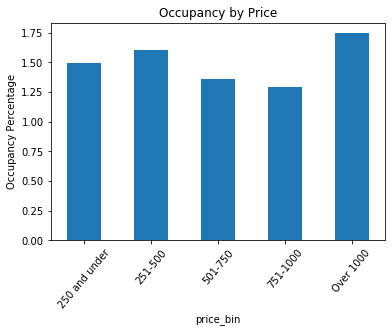

In [71]:
sentiment_bypricebin.plot.bar(legend=False,rot=50)
plt.ylabel("Occupancy Percentage")
plt.title("Occupancy by Price")
plt.savefig('Occupancy by Price Range')